# Einführung Fuzzy-Systeme

LV Soft Computing SS2021 (Master ETuIT, HSM, (c) Christoph Menz) 

***

*SciKit-Fuzzy*

https://pythonhosted.org/scikit-fuzzy/

https://pythonhosted.org/scikit-fuzzy/install.html

***

In [115]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

## Beipiel Berechnung des Trinkgeldes

Trinkgeld = f(Qualität,Service)

Die Bewertung von Qualität und Serveice erfolgt jeweils als scharfer Wert auf einer Skala von 0 bis 10. Die Inferenz basiert auf Regeln der Form:

WENN Qualität ist ... UND/ODER Service ist ... DANN TRINKGELD ist ... 


### 1. Fuzzyfizierung - Definition von linguistischen Variablen und Zugehörigkeitsfunktionen

Linguistische Eingangsvariablen werden in diesem Modul mit "Antecedent", Ausgangsvariablen mit "Consequent" bezeichnet. 

Wir definieren zunächst die linguitische Variable "Qualität" mit Wertebereich und Bezeichnung:

In [119]:
quality = ctrl.Antecedent(np.arange(0, 11, 0.01), 'quality')

Es lassen sich automatische Zugehörigkeiten (3,5,7) erstellen:

c:\program files\python36\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


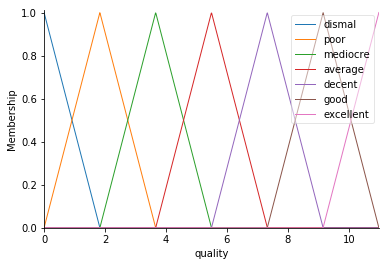

In [121]:
quality.automf(7)#5,7
quality.view()

Wir können natürlich auch eigene Zugehörigkeiten definieren:

c:\program files\python36\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


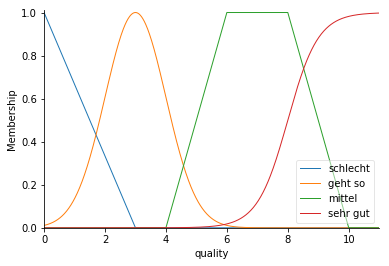

In [129]:
quality = ctrl.Antecedent(np.arange(0, 11, .01), 'quality')
quality['schlecht'] = fuzz.trimf(quality.universe, [0, 0, 3])
quality['geht so'] = fuzz.gaussmf(quality.universe, 3, 1)
quality['mittel'] = fuzz.trapmf(quality.universe, [4, 6, 8, 10])
quality['sehr gut'] = fuzz.sigmf(quality.universe, 8, 2)
quality.view()

Definition von Ein- und Ausgangsvariablen mit Dreicksfunktionen:

c:\program files\python36\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


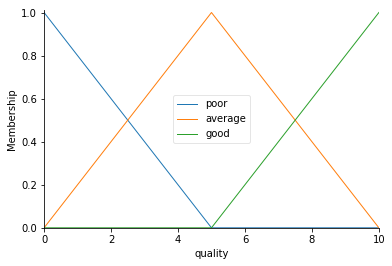

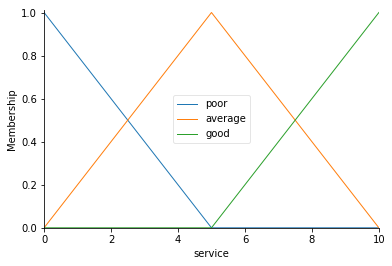

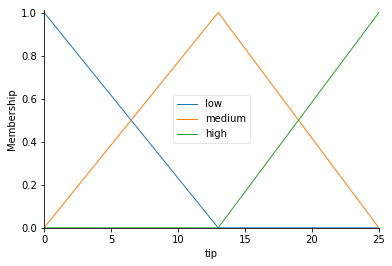

In [130]:
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')


quality.automf(3)
service.automf(3)

tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

quality.view()
service.view()
tip.view()

### 2. Fuzzy Inferenz - Definition und Anwendung von Regeln

Definition von Regeln

In [152]:
rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
rule1 = ctrl.Rule(quality['poor'] & service['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] & quality['good'], tip['high'])

Erstellen Fuzzy-Control-System

In [153]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

### 3. Defuzzyfizierung - Simulation

ggf. Anpassung der Defuzzifizierungsmethode

In [154]:
tip.defuzzify_method = 'centroid' #'centroid' ,'mom','som','lom'...

Simulation des Systems

In [155]:
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

7.602587286821703


c:\program files\python36\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


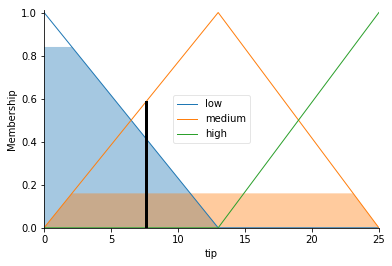

In [157]:
tipping.input['quality'] = 0.5
tipping.input['service'] = 0.8

tipping.compute()

print(tipping.output['tip'])
tip.view(sim=tipping)